
#OBJECTIVE:
The FIFA World Cup is a global football competition contested by the various football-playing nations of the world. It is contested every four years and is the most prestigious and important trophy in the sport of football. The World Cups dataset show all information about all the World Cups in the history, while the World Cup Matches dataset shows all the results from the matches contested as part of the cups. And the world cup players shows the players information participate in the world cups.

We will try to answer the following Questions:

1. How many countries had won the cup?
2. Number of goals per country?
3. Tops 10 countries by goals scored?
4. What is the number attendance, number of teams qualified, number of goals and number of matches per world cup?
5. What is the average highest attendance by stadium?
6. Which teams scored the most goals ?
7. Which player scored the highest goals?
8. Which player attain the red cards?
9. What are the countries which managed to win a cup as a hoster of the tournament?
10. Who are the Top 5 players who played maximum matches in world cup?


In [ ]:
#Importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import plotly as py


In [ ]:
#Connecting My Drive to Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Reading the data**

In [ ]:
#Reading data from CSV files and Storing them into dataframe for manipulation
world_cups = pd.read_csv('/content/drive/MyDrive/CollegeRanker PROJECTS /Project 1/WorldCups.csv')               
world_cup_player = pd.read_csv('/content/drive/MyDrive/CollegeRanker PROJECTS /Project 1/WorldCupPlayers.csv')
world_cups_matches = pd.read_csv('/content/drive/MyDrive/CollegeRanker PROJECTS /Project 1/WorldCupMatches.csv')

#**Data processing**

I wanted to old Germany and the new to be on the same name and also 'Attendance' column as integer type.

In [ ]:
#DROP NA VALUES
world_cup_player = world_cup_player.dropna()                                
world_cups = world_cups.dropna()
world_cups_matches = world_cups_matches.dropna()

In [ ]:
#Replacing 'Germany FR' with 'Germany'
world_cups = world_cups.replace('Germany FR', 'Germany')
world_cup_player = world_cup_player.replace('Germany FR', 'Germany')
world_cups_matches = world_cups_matches.replace('Germany FR', 'Germany')

In [ ]:
#Converting Attendance Values into int type and replacing '.' with ','
world_cups['Attendance'] = world_cups['Attendance'].str.replace('.', '').astype('int64')


<ipython-input-13-e5175bcd0d76>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  world_cups['Attendance'] = world_cups['Attendance'].str.replace('.', '').astype('int64')


#**A quick overview**

In [ ]:
world_cups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000


In [ ]:
world_cup_player.head(2)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'


In [ ]:
world_cups_matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


#**How many countries had won the cup ?**

Text(0.5, 1.0, 'Number of CUPS win')

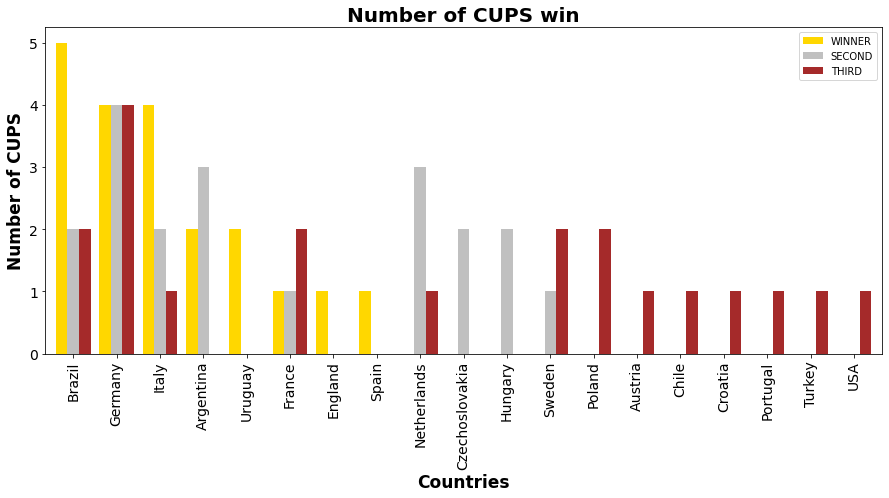

In [ ]:
#Counting Gold, Silver, and Bronze medals
gold = world_cups["Winner"]
silver = world_cups["Runners-Up"]
bronze = world_cups["Third"]

gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze_count = pd.DataFrame.from_dict(bronze.value_counts())
podium_count = gold_count.join(silver_count, how='outer').join(bronze_count, how='outer')
podium_count = podium_count.fillna(0)
podium_count.columns = ['WINNER', 'SECOND', 'THIRD']
#Sorting Medal Counts in Descending Order.
podium_count = podium_count.sort_values(by=['WINNER', 'SECOND', 'THIRD'], ascending=False)

#Plotting Gold, Silver, and Bronze medals won by Teams.
podium_count.plot(y=['WINNER', 'SECOND', 'THIRD'], kind="bar", 
                  color =['gold','silver','brown'], figsize=(15, 6), fontsize=14,
                 width=0.8,align='center')
plt.xlabel('Countries', size = 17, color = 'black', fontweight = 'bold')
plt.ylabel('Number of CUPS', size = 17, color = 'black', fontweight = 'bold')
plt.title('Number of CUPS win', size = '20', color = 'black', fontweight = 'bold')


#**Number of goals per country**

Text(0.5, 1.0, ' Number of goals per country')

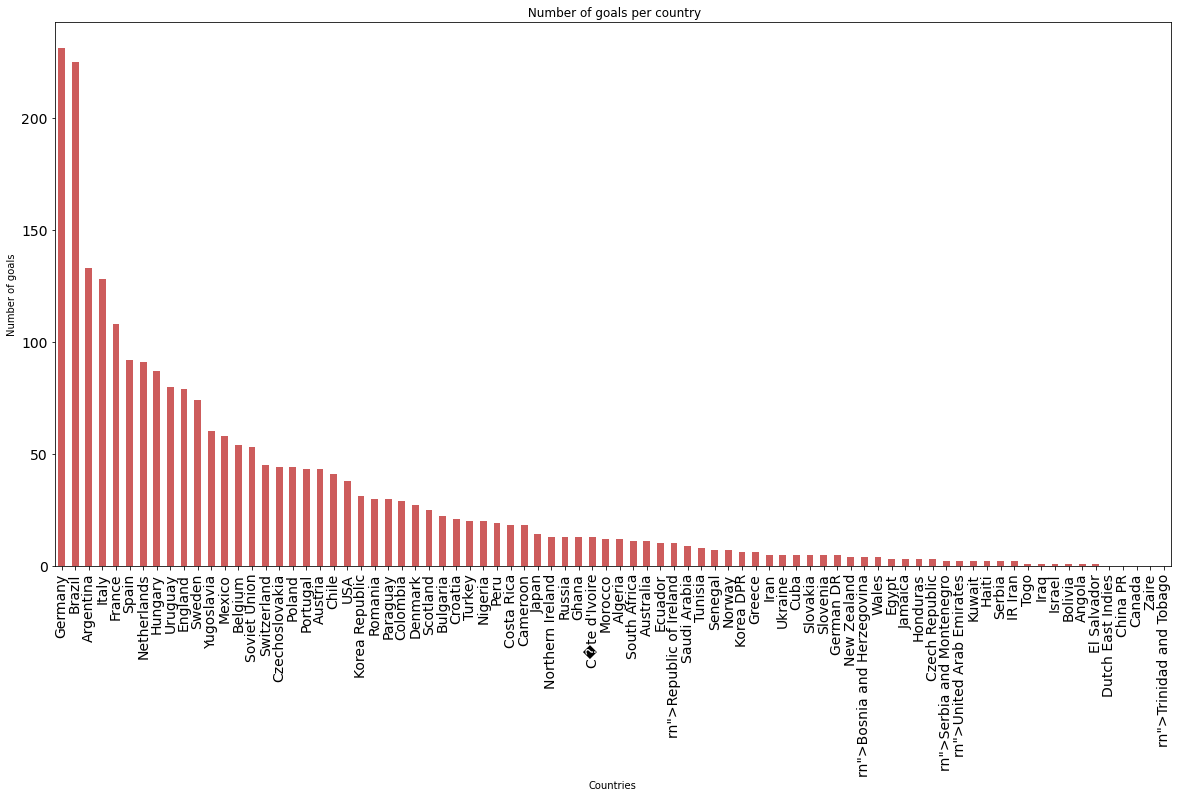

In [ ]:
#Counting Home and Away Goals by Teams.
home = world_cups_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = world_cups_matches[['Away Team Name', 'Away Team Goals']].dropna()

#Total Goals by Every country.
goal_per_country = pd.DataFrame(columns=['countries', 'goals'])
goal_per_country = goal_per_country.append(home.rename(index=str, columns={'Home Team Name': 'countries', 'Home Team Goals': 'goals'}))
goal_per_country = goal_per_country.append(away.rename(index=str, columns={'Away Team Name': 'countries', 'Away Team Goals': 'goals'}))

goal_per_country['goals'] = goal_per_country['goals'].astype('int64')

goal_per_country = goal_per_country.groupby(['countries'])['goals'].sum().sort_values(ascending=False)

#Plotting Number of Goals by Each Country.
goal_per_country.plot(x = goal_per_country.index, y = goal_per_country.values, kind="bar",color = '#CD5C5C',figsize=(20, 10), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title(' Number of goals per country')

Text(0.5, 1.0, 'Top 10 of Number of goals by country')

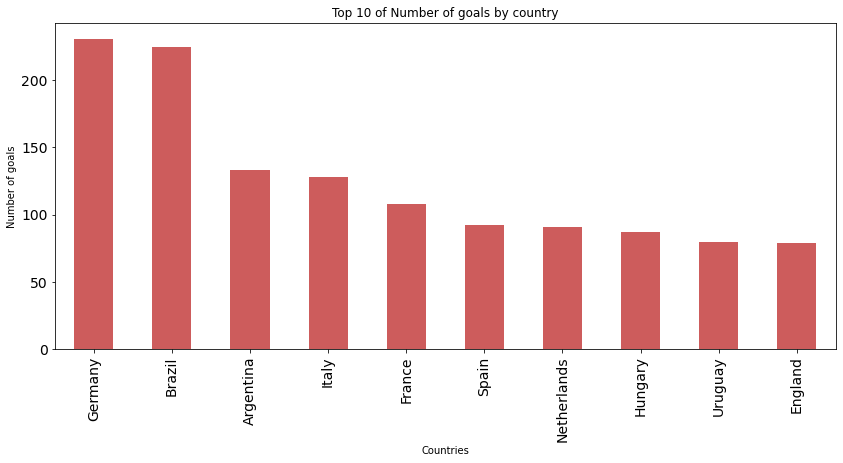

In [ ]:
#10 Countries with most number of goals.
goal_per_country[:10].plot(x = goal_per_country.index, y = goal_per_country.values, kind="bar",color = '#CD5C5C',figsize=(14, 6), fontsize=14)
plt.xlabel('Countries')
plt.ylabel('Number of goals')
plt.title('Top 10 of Number of goals by country')

#**Stadium with Highest Average Attendance**

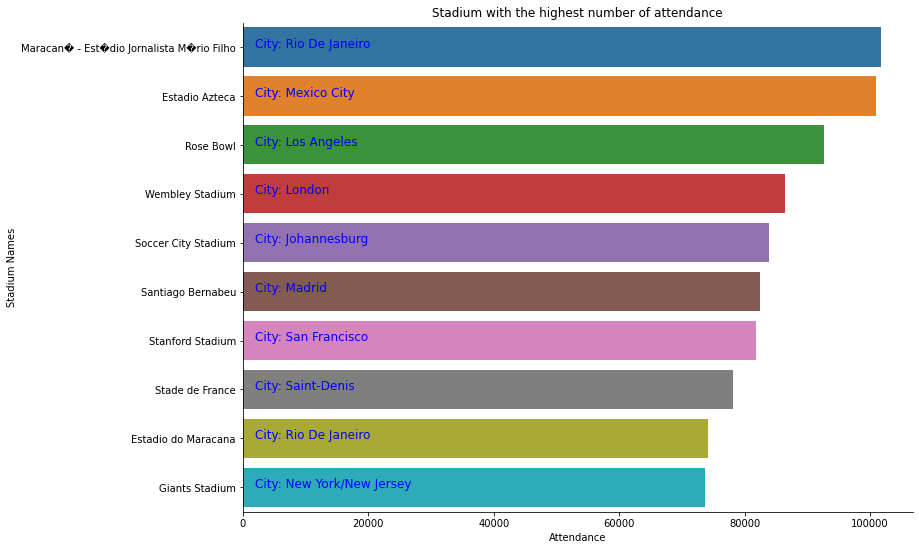

In [ ]:
#Calculating Average of Attendees Per Stadium
world_cups_matches['Year'] = world_cups_matches['Year'].astype(int)

std = world_cups_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

#Plotting Graph for Average Attendees per Stadium from Year 1930-2014.
plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the highest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()

#**Attendance, number of teams, goals and matchs per cup**

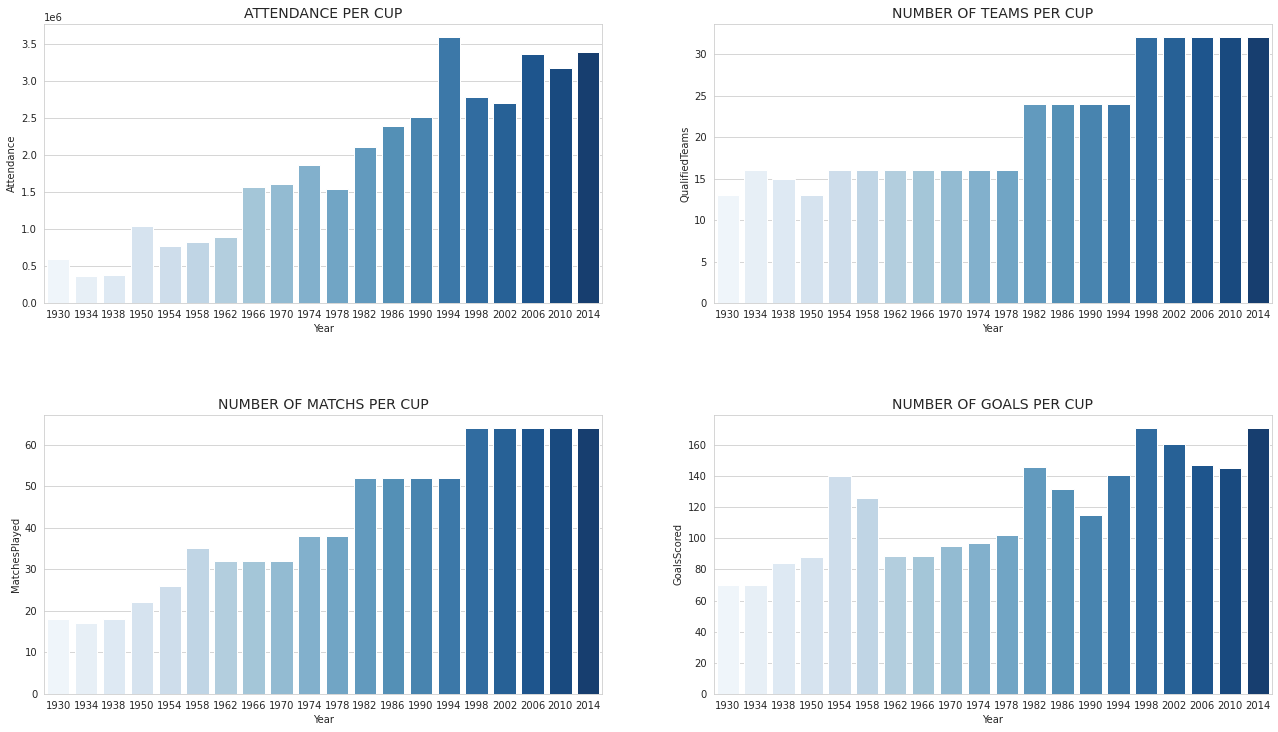

In [ ]:
#Plotting Subplots for Four Cases :-
#1. Attendance per World Cup.
#2. Number of Teams Qualified per World Cup.
#3. Number of Goals per World Cup.
#4. Number of Matches Per World Cup.
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data=world_cups, palette="Blues")
g1.set_title("ATTENDANCE PER CUP", fontsize=14)

plt.subplot(222)
g2 = sns.barplot(x="Year", y="QualifiedTeams", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF TEAMS PER CUP", fontsize=14)

plt.subplot(223)
g2 = sns.barplot(x="Year", y="MatchesPlayed", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF MATCHS PER CUP", fontsize=14)

plt.subplot(224)
g2 = sns.barplot(x="Year", y="GoalsScored", data=world_cups, palette="Blues")
g2.set_title("NUMBER OF GOALS PER CUP", fontsize=14)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

#**Which teams scored the most goals per cup ?**

So I want to make an analysis about the number of goals per Team per cup and then of all the cups so I need to create a new dataset based on the world_cups_matches set. I will perform I a kind of "map reduce" opperation :

* 1st : I extract the year, home team name and home team goals and sum the goals per year and team name

* 2nd : Same opperation but with the away team

* 3rd : Join it by team name and year

In [ ]:
#Counting Home and Away Goals to Compute total Goals.
home_team_goal = world_cups_matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
away_team_goal = world_cups_matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
team_goal = pd.concat([home_team_goal, away_team_goal], axis=1)
team_goal = team_goal.fillna(0)
team_goal['goals'] = team_goal['Home Team Goals'] + team_goal['Away Team Goals']
team_goal = team_goal.drop(['Home Team Goals', 'Away Team Goals'], axis=1)
team_goal = pd.DataFrame.from_dict(team_goal.to_dict()).reset_index().rename(index=str, columns={'level_0':'Year', 'level_1':'Team'})

team_goal = team_goal.sort_values(by=['Year', 'goals'], ascending=[True, False])
team_goal_top_5 = team_goal.groupby('Year').head(5)


In [ ]:
#Sorting Team Goals in Descending Order.
team_goal = team_goal.sort_values(by=['goals'],ascending = False)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

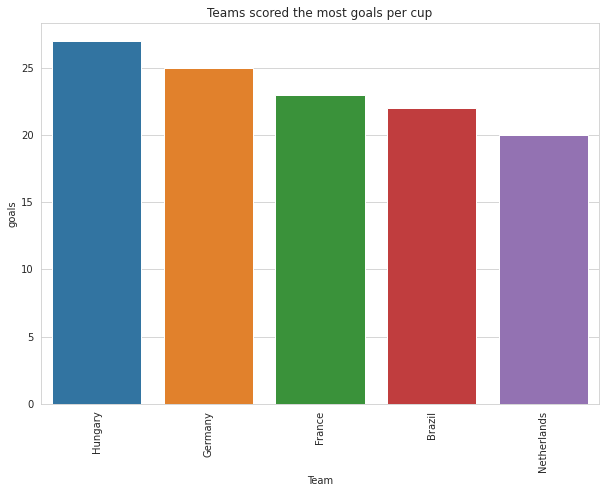

In [ ]:
#Plotting barplot for Most Goals Scored by Teams in a Single World Cup.
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=team_goal.head(6),x='Team',y='goals')
plt.title('Teams scored the most goals per cup')
plt.xticks(rotation = 90)

#Highest home goals scored

In [ ]:
home_team_goals = pd.DataFrame(home_team_goal)

In [ ]:
#Computing Total Home Goals by Each Team.
total_home_goals = home_team_goals.groupby('Home Team Name')['Home Team Goals'].sum()

In [ ]:
total_home_goals = pd.DataFrame(total_home_goals)


In [ ]:
#Sorting Total Home Goals By Each Team in Descending Order.
total_home_goals = total_home_goals.sort_values(by='Home Team Goals',ascending = False)

Text(0.5, 1.0, 'Highest Home Goals Scored')

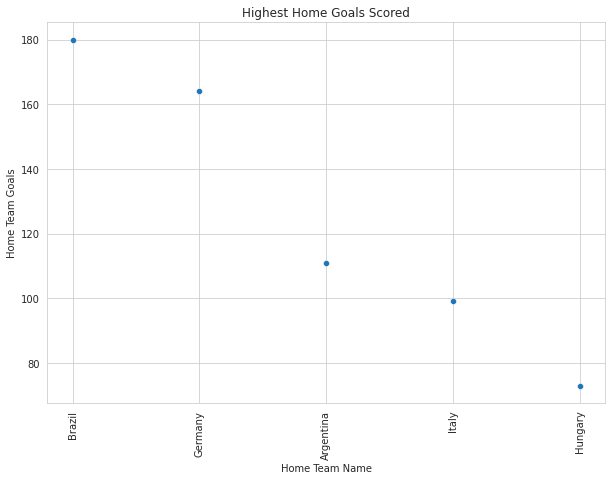

In [ ]:
#Plotting Most Home Goal Scored by Top 5 Teams.
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=total_home_goals.head(5),x='Home Team Name',y='Home Team Goals')
plt.xticks(rotation = 90)
plt.title('Highest Home Goals Scored')

#Hightest away goals scored

In [ ]:
away_team_goal = pd.DataFrame(away_team_goal)
away_team_goal

Away Team Goals
Year Away Team Name                             
1930 Argentina                               2.0
     Belgium                                 0.0
     Bolivia                                 0.0
     Brazil                                  1.0
     Chile                                   1.0
...                                          ...
2014 Spain                                   3.0
     Switzerland                             3.0
     USA                                     4.0
     Uruguay                                 1.0
     rn">Bosnia and Herzegovina              1.0

[411 rows x 1 columns]

In [ ]:
#Computing Total Away Goals by Each Team.
total_away_goal = away_team_goal.groupby('Away Team Name')['Away Team Goals'].sum()
total_away_goal = pd.DataFrame(total_away_goal)
#Sorting Away Goals by Each team in Descending Order.
total_away_goals = total_away_goal.sort_values(by='Away Team Goals',ascending=False)

In [ ]:
total_away_goals

,Away Team Goals
Away Team Name,
Germany,67.0
Brazil,45.0
Spain,42.0
Netherlands,40.0
France,40.0
...,...
Bolivia,0.0
Zaire,0.0
Dutch East Indies,0.0


Text(0.5, 1.0, 'Highest Away Goals Scored by Teams')

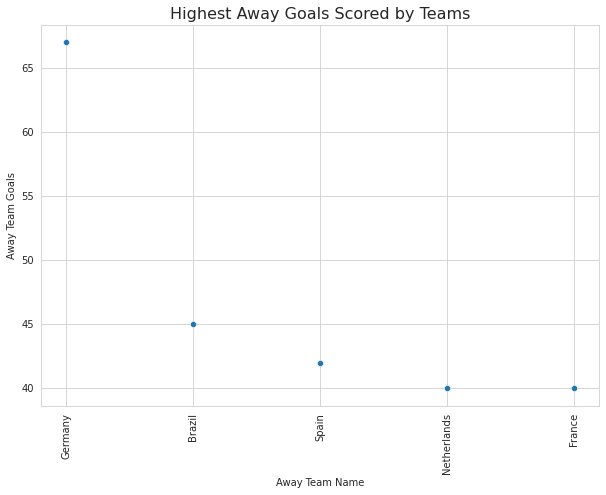

In [ ]:
#Plotting Top 5 highest Scoring Team in Away Ground.
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=total_away_goals.head(5),x='Away Team Name',y='Away Team Goals')
plt.xticks(rotation = 90)
plt.title('Highest Away Goals Scored by Teams', size = 16)

#Number of goals scored by players

In [ ]:
world_cup_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70'
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83'
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40'
...,...,...,...,...,...,...,...,...,...
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96'
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90'
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2'
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'


In [ ]:
#Function for Counting Goal count based on Goal and Penalties Events.
def count_goals(x):
  count=0
  for i in x:
    if (i=='G') or (i=='P'):
      count+=1
  return count


In [ ]:
world_cup_player['Goal'] = world_cup_player['Event'].apply(count_goals)
world_cup_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goal
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62',1
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70',0
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83',2
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40',1
...,...,...,...,...,...,...,...,...,...,...
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96',0
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90',0
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2',0
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3',1


In [ ]:
#Computing total goals by each player.
player_goals = world_cup_player.groupby('Player Name')['Goal'].sum()
player_goals = pd.DataFrame(player_goals)

In [ ]:
player_goals = player_goals.sort_values(by='Goal',ascending = False)

Text(0.5, 1.0, 'Highest Goal scored by Players')

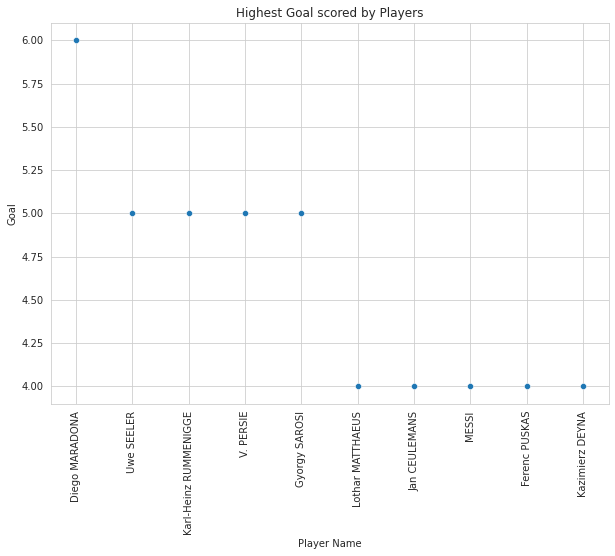

In [ ]:
#Plotting highest Goal Scorers.
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data=player_goals.head(10),x='Player Name',y = 'Goal')
plt.xticks(rotation = 90)
plt.title('Highest Goal scored by Players')

#Red card holders

In [ ]:
#Function for Counting no. of red Cards.
def count_Red_Cards(x):
  count=0
  for i in x:
    if i=='P':
      count+=1
  return count

In [ ]:
world_cup_player['Red_Card'] = world_cup_player['Event'].apply(count_Red_Cards)
world_cup_player

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goal,Red_Card
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1,0
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62',1,0
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70',0,0
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83',2,0
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40',1,0
...,...,...,...,...,...,...,...,...,...,...,...
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96',0,0
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90',0,0
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2',0,0
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3',1,1


In [ ]:
total_red_cards = pd.DataFrame(world_cup_player.groupby('Player Name')['Red_Card'].sum())
total_red_cards = total_red_cards.sort_values(by='Red_Card',ascending = False)
total_red_cards

,Red_Card
Player Name,
V. PERSIE,2
Fritz WALTER,2
ZIDANE,2
Daniel PASSARELLA,2
HIERRO,2
...,...
HAMSIK,0
HAMMOUDI RAAD,0
HALLICHE,0


Text(0.5, 1.0, 'Player VS Red Cards')

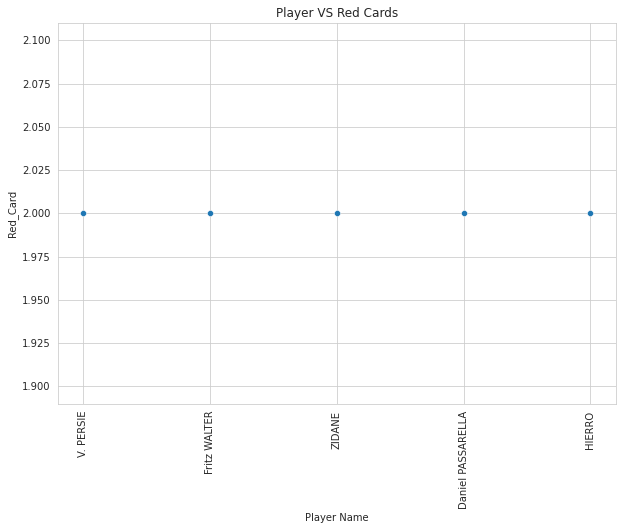

In [ ]:
#Plotting highest number of Red Cards attained by a players.
fig,ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data = total_red_cards.head(5),x='Player Name',y = 'Red_Card')
plt.xticks(rotation = 90)
plt.title('Player VS Red Cards')

#What are the countries which managed to win a cup as a hoster of the tournament?

In [ ]:
#Countries that hosted and Won the world Cup in the Same Year.
hoster_is_winner = world_cups[(world_cups['Winner']== world_cups['Country'])]
hoster_is_winner[['Year','Country','Winner']]

,Year,Country,Winner
0,1930,Uruguay,Uruguay
1,1934,Italy,Italy
7,1966,England,England
9,1974,Germany,Germany
10,1978,Argentina,Argentina
15,1998,France,France


#Top 5 players who played maximum matches in world cup.

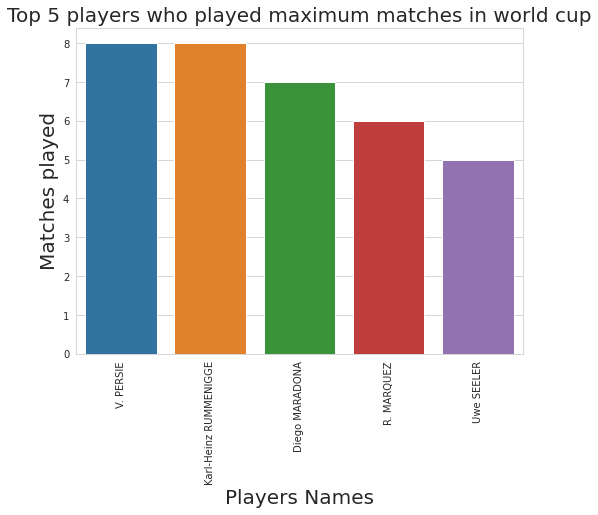

In [ ]:
#Plotting Players with highest Matches Played in the World Cup.
plt.figure(figsize=(8,6))
max_played = world_cup_player['Player Name'].value_counts().reset_index().head()
sns.barplot(data=max_played,x='index',y = 'Player Name')
plt.xticks(rotation = 90)
plt.xlabel("Players Names", size=20)
plt.ylabel("Matches played", size=20)
plt.title("Top 5 players who played maximum matches in world cup", size=20)
plt.show()

## Observations and Conclusion
Here we are going to discuss the observations and conclusions drawn from them. The following are the conclusions and observations.

* Brazil has won the most number of gold from 1930 to 2014, whereas Germany has most number of Silver and Bronze.

* Germany scored the most number of goals against their opponents. Total number of goals scored by Germany is 200+.

* Rio De Janeiro city observed the most number of attendees from 1930 to 2014 followed by Mexico city. Both the cities observed 100000+ average attendees. Wherein 1994 the highest attendance was observed for World Cup.

* From 1954 to 1978 only 16 teams qualifies for playing the world cup, after 1978 world cup 24 teams used to qualify world cup and this number was further increased to 32 after the year 2002. Whereas before 1954 no fix number of qualifying teams is observed.

* The increase in number of qualifying teams resulted in the increase of matches played per cup. Whereas the number of goals per world cup are not consistent.

* Highest Number of goals scored in a single world cup is in year 1998 with more than 160 goals and Hungary is the highest goals scoring team in a single world cup with 25+ goals.

* As for the most home goals scoring team Brazil is at top with 180 goals and for the most away goals Germany takes the top spot with 67 goals.

* Deigo Maradona is the highest goal and penalty scoring player with a total of 6 goals.

* Mostly 2 red cards are attained by a single player from 1930-2014 world cups.

* Uruguay, Italy, Germany, England, Argentina and France are the only teams that won the world cup in the year they hosted it.

* V. Persie and Karl-Heinz are the two players with most number of matches played during world cup.